In [1]:
# import ML tools
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from pandas import json_normalize
import json

In [2]:
# import plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
# set grid size and style
figsize(12, 4)
sns.set_style('whitegrid')

Use "mp.colors(<index>)" as color attribute for Seaborn plots.
This is your color palette...


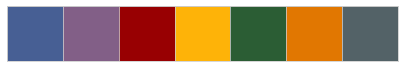

In [3]:
# import custom palette
import my_palette as mp

To begin, I need to munge the data a bit, as it is generalized for use on a variety of problems.

> **MOVIE DATASET**

In [4]:
# read in movie dataset
movie_df = pd.read_json('tmdb_movie_clean.json')
movie_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,171236,171237,171238,171239,171240,171241,171242,171243,171244,171245
budget,4e+06,2.1e+07,42000,1.1e+07,9.4e+07,5.5e+07,1.5e+07,839727,1.28e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genres,"[Crime, Comedy]","[Action, Thriller, Crime]",[Documentary],"[Adventure, Action, Science Fiction]","[Animation, Family]","[Comedy, Drama, Romance]",[Drama],"[Mystery, Drama]","[Drama, Crime]","[Horror, Thriller, Mystery]",...,[Documentary],[],[],[],[],[Music],[],[Documentary],[],[]
id,5,6,8,11,12,13,14,15,16,17,...,701689,701692,701695,701702,701705,701706,701707,701710,701714,701729
imdb_id,tt0113101,tt0107286,tt0825671,tt0076759,tt0266543,tt0109830,tt0169547,tt0033467,tt0168629,tt0411267,...,None,None,None,None,None,None,None,tt1821695,None,None
overview,It's Ted the Bellhop's first night on the job....,"While racing to a boxing match, Frank, Mike, J...",Timo Novotny labels his new project an experim...,Princess Leia is captured and held hostage by ...,"Nemo, an adventurous young clownfish, is unexp...",A man with a low IQ has accomplished great thi...,"Lester Burnham, a depressed suburban father in...","Newspaper magnate, Charles Foster Kane is take...","Selma, a Czech immigrant on the verge of blind...",Adèle and her daughter Sarah are traveling on ...,...,Set at CREST (the Centre for Research and Educ...,Tom and Jerry is an American animated franchis...,This full concert broadcast comes from our 201...,"Shakespeare's heartbreaking tale, Nureyev's bl...",Courage the Cowardly Dog is an American animat...,"Radiohead's set from June 30, 2017 at the Rock...",‘Rising Silence’ is a journey of relationships...,There are approximately 5.7 million people in ...,"SUM 41 performs live at The House of Blues, Cl...",A tantalising trio of cult lesbian movies from...
popularity,13.532,11.817,2.629,90.645,33.313,33.781,23.513,18.872,16.037,6.766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_date,1995-12-09T00:00:00.000Z,1993-10-15T00:00:00.000Z,2006-01-01T00:00:00.000Z,1977-05-25T00:00:00.000Z,2003-05-30T00:00:00.000Z,1994-07-06T00:00:00.000Z,1999-09-15T00:00:00.000Z,1941-04-30T00:00:00.000Z,2000-05-17T00:00:00.000Z,2005-09-28T00:00:00.000Z,...,2019-12-31T00:00:00.000Z,1940-02-10T00:00:00.000Z,2017-06-01T00:00:00.000Z,None,None,2017-06-30T00:00:00.000Z,None,None,None,2010-10-04T00:00:00.000Z
revenue,4.25735e+06,1.21369e+07,NaN,7.75398e+08,9.40336e+08,6.77388e+08,3.56297e+08,2.32177e+07,4.00319e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
runtime,98,110,80,121,100,142,122,119,141,87,...,80,NaN,NaN,144,NaN,129,75,85,75,140
tagline,Twelve outrageous guests. Four scandalous requ...,Don't move. Don't whisper. Don't even breathe.,A Megacities remix.,"A long time ago in a galaxy far, far away...",There are 3.7 trillion fish in the ocean. They...,Life is like a box of chocolates...you never k...,Look closer.,It's terrific!,You don't need eyes to see.,One of the living for one of the dead.,...,None,None,None,"Shakespeare's heartbreaking tale, Nureyev's bl...",None,None,None,Bipolar and Living,"concert, punk rock, live",None


In [5]:
# convert release dates to datetime objects and remove timezone-aware index
movie_df['release_date'] = pd.to_datetime(movie_df['release_date']).dt.tz_localize(None)
movie_df.head().transpose()

,0,1,2,3,4
budget,4e+06,2.1e+07,42000,1.1e+07,9.4e+07
genres,"[Crime, Comedy]","[Action, Thriller, Crime]",[Documentary],"[Adventure, Action, Science Fiction]","[Animation, Family]"
id,5,6,8,11,12
imdb_id,tt0113101,tt0107286,tt0825671,tt0076759,tt0266543
overview,It's Ted the Bellhop's first night on the job....,"While racing to a boxing match, Frank, Mike, J...",Timo Novotny labels his new project an experim...,Princess Leia is captured and held hostage by ...,"Nemo, an adventurous young clownfish, is unexp..."
popularity,13.532,11.817,2.629,90.645,33.313
release_date,1995-12-09 00:00:00,1993-10-15 00:00:00,2006-01-01 00:00:00,1977-05-25 00:00:00,2003-05-30 00:00:00
revenue,4.25735e+06,1.21369e+07,NaN,7.75398e+08,9.40336e+08
runtime,98,110,80,121,100
tagline,Twelve outrageous guests. Four scandalous requ...,Don't move. Don't whisper. Don't even breathe.,A Megacities remix.,"A long time ago in a galaxy far, far away...",There are 3.7 trillion fish in the ocean. They...


In [6]:
# observe movie DataFrame
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171246 entries, 0 to 171245
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   budget        13635 non-null   float64       
 1   genres        171246 non-null  object        
 2   id            171246 non-null  int64         
 3   imdb_id       129045 non-null  object        
 4   overview      167715 non-null  object        
 5   popularity    171198 non-null  float64       
 6   release_date  152368 non-null  datetime64[ns]
 7   revenue       8309 non-null    float64       
 8   runtime       120310 non-null  float64       
 9   tagline       46123 non-null   object        
 10  title         171246 non-null  object        
 11  vote_average  81872 non-null   float64       
 12  vote_count    82029 non-null   float64       
 13  cast          171246 non-null  object        
 14  crew          171246 non-null  object        
 15  reviews       171

Since I am not looking at text data for this project, I will drop overview, tagline, and reviews columns.<br>
Because I'm not collecting data from other sources, I will drop the IMDb ID column.<br>
The popularity values reflect current trends. I will not use that, because I want to observe these movies in their own time frame.<br>
Since I am only looking at acting departments, I will not need the crew data.

In [7]:
# drop columns that will not be used
movie_df.drop(['imdb_id', 'overview', 'popularity', 'tagline', 'crew', 'reviews'], axis=1, inplace=True)

In [8]:
# rename TMDb movie ID to distinguish it from actor id's
movie_df.rename(columns={'id': 'movie_id'}, inplace=True)

Since this is all the data I will use for the project, I will drop all rows where any value is missing.

In [9]:
movie_df.dropna(inplace=True)

I need to check for empty lists in the genres and cast columns.

In [10]:
# count empty cast lists
movie_df['cast'].str.len().eq(0).sum()

13

In [11]:
# remove empty cast lists
movie_df = movie_df[movie_df['cast'].map(lambda d: len(d)) > 0]

In [12]:
# count empty genres lists
movie_df['genres'].str.len().eq(0).sum()

19

In [13]:
# remove empty genres lists
movie_df = movie_df[movie_df['genres'].map(lambda d: len(d)) > 0]

In [14]:
# observe how many movies we have left
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5805 entries, 0 to 169380
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   budget        5805 non-null   float64       
 1   genres        5805 non-null   object        
 2   movie_id      5805 non-null   int64         
 3   release_date  5805 non-null   datetime64[ns]
 4   revenue       5805 non-null   float64       
 5   runtime       5805 non-null   float64       
 6   title         5805 non-null   object        
 7   vote_average  5805 non-null   float64       
 8   vote_count    5805 non-null   float64       
 9   cast          5805 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 498.9+ KB


In [15]:
# observe numerical values
movie_df.describe()

,budget,movie_id,revenue,runtime,vote_average,vote_count
count,5.805000e+03,5805.00000,5.805000e+03,5805.000000,5805.000000,5805.000000
mean,3.200695e+07,90452.89509,9.449903e+07,108.505254,6.409716,1541.706977
std,4.165488e+07,144658.94179,1.811366e+08,20.417376,0.983087,2553.825764
min,1.000000e+00,5.00000,1.000000e+00,70.000000,1.000000,1.000000
25%,5.000000e+06,9339.00000,5.634828e+06,95.000000,5.800000,152.000000
50%,1.775977e+07,16668.00000,2.978900e+07,105.000000,6.400000,589.000000
75%,4.000000e+07,84174.00000,1.020000e+08,118.000000,7.000000,1748.000000
max,3.800000e+08,691633.00000,2.797801e+09,338.000000,10.000000,25603.000000


The budget and revenue each have minimum values of $1. I will examine this and determine reasonable minimum values to accept.<br>
I am going to combine these two features into a return on investment (ROI) feature to observe profitability.

The runtime looks good, as it has the minimum length allowable for a feature length movie. I will look closer at the movies with long runtimes for errors.

The vote average is from one to ten, which looks good.<br>
The vote count looks good, as well.<br>
I will combine these last two features into a weighted average to penalize movies with few votes.

> **Inflation**

Before doing anything to columns with dollar values, I need to adjust them for inflation.

I will read in the Consumer Price Index (CPI) data I downloaded from the Federal Reserve Economic Data (FRED).<br>
I have already created a CPI multiplier column that can be used to convert values to dollars for the time when this dataset was extracted.<br>
This dataset hold monthly inflation rates from the first month of 1913 until March of 2020.

In [16]:
# load inflation data
inflation_df = pd.read_csv('cpi_multiplier.csv', index_col=0)
inflation_df.iloc[np.r_[0:3, -3:0]]

,date,cpiaucns,cpi_multiplier
0,1913-01-01,9.800,26.338265
1,1913-02-01,9.800,26.338265
2,1913-03-01,9.800,26.338265
1284,2020-01-01,257.971,1.000558
1285,2020-02-01,258.678,0.997824
1286,2020-03-01,258.115,1.000000


In [17]:
# checking that the data is clean
inflation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 1286
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1287 non-null   object 
 1   cpiaucns        1287 non-null   float64
 2   cpi_multiplier  1287 non-null   float64
dtypes: float64(2), object(1)
memory usage: 40.2+ KB


I need to convert the dates to datetime objects.

In [18]:
# convert with UTC data
inflation_df['date'] = pd.to_datetime(inflation_df['date'], format='%Y/%m/%d')
inflation_df['date'].dtype

dtype('<M8[ns]')

Now, I need to merge this into the main DataFrame.<br>
First, I need to sort the main DataFrame by date.

In [19]:
# sort by release date
movie_df.sort_values('release_date', inplace=True)
movie_df.iloc[np.r_[0:2, -2:0]]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast
36094,5700.0,"[Drama, Crime]",96128,1913-11-24,1800000.0,88.0,Traffic in Souls,5.6,12.0,"[{'cast_id': 10, 'character': 'Mary Barton', '..."
352,100000.0,"[Drama, History, War]",618,1915-02-08,11000000.0,193.0,The Birth of a Nation,6.3,277.0,"[{'cast_id': 16, 'character': 'Elsie Stoneman'..."
137701,14000000.0,"[Action, Thriller, Horror]",514847,2020-03-11,6512500.0,90.0,The Hunt,6.8,607.0,"[{'cast_id': 29, 'character': 'Crystal', 'cred..."
168527,27000000.0,"[Mystery, Action, Crime, Drama, Thriller]",686704,2020-03-16,48320000.0,115.0,Scarlet Tulips,10.0,1.0,"[{'cast_id': 2, 'character': 'Sebastian Spade'..."


Now, I will bring the inflation data into my main DataFrame.

In [20]:
# merge the two datasets aligning the CPI dates to the nearest release dates going forward
movie_df = pd.merge_asof(movie_df, inflation_df, left_on='release_date', right_on='date')
movie_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,5795,5796,5797,5798,5799,5800,5801,5802,5803,5804
budget,5700,100000,8.39475e+06,1e+06,200000,250000,120000,1.1e+06,1.13565e+06,923000,...,7.5e+07,8.5e+07,7e+06,1.09e+08,1e+07,3e+06,9e+06,4.2e+07,1.4e+07,2.7e+07
genres,"[Drama, Crime]","[Drama, History, War]","[Drama, History]","[Fantasy, Drama]","[Adventure, Drama, Action, Science Fiction]","[Comedy, Drama]",[Drama],[Drama],"[Romance, Adventure, Fantasy]","[Adventure, Comedy, Drama]",...,"[Action, Crime, Comedy]","[Action, Science Fiction, Comedy, Family]","[Science Fiction, Fantasy, Horror]","[Drama, Adventure, Family]","[Horror, Mystery, Thriller]",[Comedy],"[Thriller, Science Fiction, Horror]","[Action, Science Fiction]","[Action, Thriller, Horror]","[Mystery, Action, Crime, Drama, Thriller]"
movie_id,96128,618,3059,278480,30266,54242,278093,35227,28963,962,...,495764,454626,539537,481848,555974,566927,570670,338762,514847,686704
release_date,1913-11-24 00:00:00,1915-02-08 00:00:00,1916-09-04 00:00:00,1916-10-16 00:00:00,1916-12-24 00:00:00,1918-08-01 00:00:00,1919-08-26 00:00:00,1922-01-11 00:00:00,1924-03-18 00:00:00,1925-06-25 00:00:00,...,2020-02-05 00:00:00,2020-02-12 00:00:00,2020-02-12 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,2020-02-21 00:00:00,2020-02-26 00:00:00,2020-03-05 00:00:00,2020-03-11 00:00:00,2020-03-16 00:00:00
revenue,1.8e+06,1.1e+07,4e+06,1.39e+06,8e+06,8e+06,3.6e+06,400200,1.21388e+06,2.5e+06,...,2.01858e+08,2.65494e+08,4.70785e+07,1.07605e+08,2.03115e+07,1.07e+07,1.23415e+08,2.45736e+07,6.5125e+06,4.832e+07
runtime,88,193,197,180,105,93,80,143,149,95,...,109,99,109,100,86,92,124,110,90,115
title,Traffic in Souls,The Birth of a Nation,Intolerance: Love's Struggle Throughout the Ages,A Daughter of the Gods,"20,000 Leagues Under the Sea",Mickey,The Miracle Man,Foolish Wives,The Thief of Bagdad,The Gold Rush,...,Birds of Prey (and the Fantabulous Emancipatio...,Sonic the Hedgehog,Fantasy Island,The Call of the Wild,Brahms: The Boy II,Impractical Jokers: The Movie,The Invisible Man,Bloodshot,The Hunt,Scarlet Tulips
vote_average,5.6,6.3,7.5,5,6.1,7,3,6.7,7.4,8,...,7.2,7.6,6,7.3,6.5,7.6,7.1,7.1,6.8,10
vote_count,12,277,157,1,18,10,1,33,71,802,...,3592,3611,610,837,349,23,1753,2076,607,1
cast,"[{'cast_id': 10, 'character': 'Mary Barton', '...","[{'cast_id': 16, 'character': 'Elsie Stoneman'...","[{'cast_id': 23, 'character': 'The Woman Who R...","[{'cast_id': 3, 'character': 'Anitia', 'credit...","[{'cast_id': 1, 'character': 'Prince Daaker's ...","[{'cast_id': 4, 'character': 'Mickey', 'credit...","[{'cast_id': 0, 'character': 'The Frog', 'cred...","[{'cast_id': 5, 'character': 'Count Wladislaw ...","[{'cast_id': 3, 'character': 'The Thief of Bag...","[{'cast_id': 7, 'character': 'The Lone Prospec...",...,"[{'cast_id': 0, 'character': 'Harleen Quinzel ...","[{'cast_id': 103, 'character': 'Sonic the Hedg...","[{'cast_id': 9, 'character': 'Mr. Roarke', 'cr...","[{'cast_id': 4, 'character': 'John Thornton', ...","[{'cast_id': 2, 'character': 'Liza', 'credit_i...","[{'cast_id': 0, 'character': 'Himself', 'credi...","[{'cast_id': 7, 'character': 'Cecilia Kass', '...","[{'cast_id': 51, 'character': 'Ray Garrison / ...","[{'cast_id': 29, 'character': 'Crystal', 'cred...","[{'cast_id': 2, 'character': 'Sebastian Spade'..."


In [21]:
# convert both monetary columns to be expressed in current dollars
movie_df.update(movie_df[['budget', 'revenue']].multiply(movie_df['cpi_multiplier'], axis='index'))
movie_df.head().transpose()

,0,1,2,3,4
budget,145669,2.58115e+06,1.95208e+08,2.2842e+07,4.45026e+06
genres,"[Drama, Crime]","[Drama, History, War]","[Drama, History]","[Fantasy, Drama]","[Adventure, Drama, Action, Science Fiction]"
movie_id,96128,618,3059,278480,30266
release_date,1913-11-24 00:00:00,1915-02-08 00:00:00,1916-09-04 00:00:00,1916-10-16 00:00:00,1916-12-24 00:00:00
revenue,4.60007e+07,2.83926e+08,9.30144e+07,3.17504e+07,1.7801e+08
runtime,88,193,197,180,105
title,Traffic in Souls,The Birth of a Nation,Intolerance: Love's Struggle Throughout the Ages,A Daughter of the Gods,"20,000 Leagues Under the Sea"
vote_average,5.6,6.3,7.5,5,6.1
vote_count,12,277,157,1,18
cast,"[{'cast_id': 10, 'character': 'Mary Barton', '...","[{'cast_id': 16, 'character': 'Elsie Stoneman'...","[{'cast_id': 23, 'character': 'The Woman Who R...","[{'cast_id': 3, 'character': 'Anitia', 'credit...","[{'cast_id': 1, 'character': 'Prince Daaker's ..."


I can get rid of the CPI values and their dates.
I only need the multipliers going forward.

In [22]:
# drop inflation data
movie_df.drop(['date', 'cpiaucns', 'cpi_multiplier'], axis=1, inplace=True)
movie_df.iloc[np.r_[0:2, -2:0]]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast
0,1.456689e+05,"[Drama, Crime]",96128,1913-11-24,4.600069e+07,88.0,Traffic in Souls,5.6,12.0,"[{'cast_id': 10, 'character': 'Mary Barton', '..."
1,2.581150e+06,"[Drama, History, War]",618,1915-02-08,2.839265e+08,193.0,The Birth of a Nation,6.3,277.0,"[{'cast_id': 16, 'character': 'Elsie Stoneman'..."
5803,1.400000e+07,"[Action, Thriller, Horror]",514847,2020-03-11,6.512500e+06,90.0,The Hunt,6.8,607.0,"[{'cast_id': 29, 'character': 'Crystal', 'cred..."
5804,2.700000e+07,"[Mystery, Action, Crime, Drama, Thriller]",686704,2020-03-16,4.832000e+07,115.0,Scarlet Tulips,10.0,1.0,"[{'cast_id': 2, 'character': 'Sebastian Spade'..."


> **BUDGET**

In [23]:
# observe quantiles and outliers
movie_df['budget'].describe()

count    5.805000e+03
mean     4.487320e+07
std      5.064286e+07
min      1.041345e+00
25%      1.059427e+07
50%      2.768892e+07
75%      5.974884e+07
max      4.340678e+08
Name: budget, dtype: float64

Now, I'll plot these numbers.

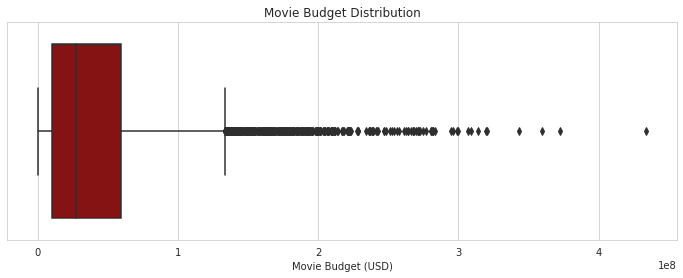

In [24]:
# plot budget quantiles

sns.boxplot(movie_df['budget'], color=mp.colors(2))

plt.xlabel('Movie Budget (USD)')
plt.title('Movie Budget Distribution');

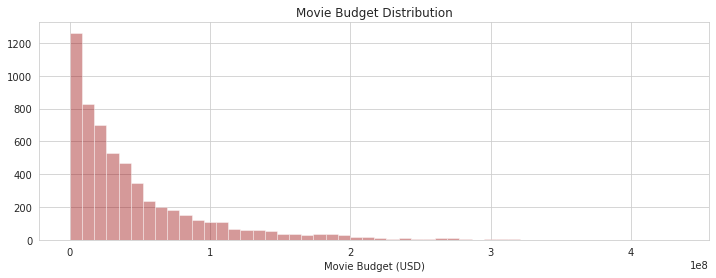

In [25]:
# plot budget distribution

sns.distplot(movie_df['budget'], bins=50, color=mp.colors(2), axlabel='Movie Budget (USD)', kde=False)

plt.title('Movie Budget Distribution');

The high budget movies are pulling the distribution far above the median value.<br>
Since this project has a return on investment focus, it is important to include these outliers to see if high budgets are correlated to high returns.

I would like to have a lower budget cutoff line<br>
I believe at a certain budget minimum, a movie is not relying on the acting being a large contributor to the overall picture.

In [26]:
# observe movies just below the $50,000 range
movie_df[movie_df['budget'] < 5e4].sort_values('budget').tail(8)

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast
4054,29491.711722,"[Drama, Fantasy, Horror]",175138,2010-11-10,6.426126e+04,81.0,Evidence Of A Haunting,3.4,5.0,"[{'cast_id': 1, 'character': '', 'credit_id': ..."
3732,30261.090790,"[Drama, Action]",26630,2009-04-14,8.638900e+05,94.0,Shank,6.3,27.0,"[{'cast_id': 1, 'character': 'Cal', 'credit_id..."
3252,31976.585728,[Documentary],1666,2006-10-27,2.299500e+05,93.0,The Bridge,7.0,129.0,"[{'cast_id': 3, 'character': 'Himself', 'credi..."
4302,34162.530607,"[Comedy, Animation]",275298,2012-01-16,1.138751e+06,93.0,The Penguins of Madagascar: Operation Antarctica,6.3,4.0,"[{'cast_id': 0, 'character': 'Kowalski / Chuck..."
4017,35449.026959,[Documentary],42296,2010-09-17,3.599191e+06,87.0,Catfish,6.9,332.0,"[{'cast_id': 3, 'character': 'Herself', 'credi..."
3798,37279.068200,"[Drama, Action, Comedy]",42151,2009-09-01,1.195148e+04,89.0,Down Terrace,6.4,39.0,"[{'cast_id': 4, 'character': 'Bill', 'credit_i..."
1258,43587.701909,"[Comedy, Drama]",14022,1991-07-05,2.327409e+06,97.0,Slacker,6.8,157.0,"[{'cast_id': 1, 'character': 'Should Have Stay..."
1534,46647.289157,[Comedy],2292,1994-09-13,5.444136e+06,92.0,Clerks,7.4,1507.0,"[{'cast_id': 7, 'character': 'Dante Hicks', 'c..."


At first, I thought of cutting the range in the hundereds of thousands of dollars, but I kept finding movies that deserved to be kept in the dataset.
After looking at the movies for a bit, the range shown above convinced me I needed to include movies over $40,000.<br>
I mean, how could I leave out Clerks and Slacker?

In [27]:
# observe how many movies are in this range
len(movie_df[movie_df['budget'] < 4e4])

211

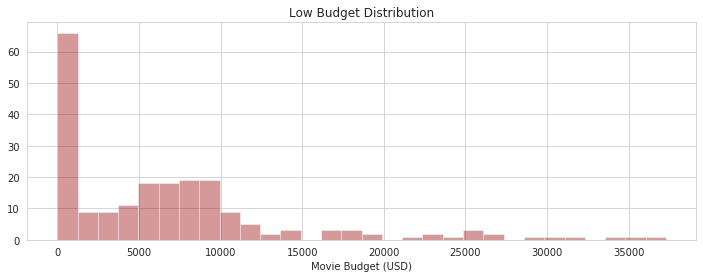

In [28]:
# plot low budget distribution

sns.distplot(movie_df[movie_df['budget'] < 4e4]['budget'], bins=30, color=mp.colors(2), 
             axlabel='Movie Budget (USD)', kde=False)

plt.title('Low Budget Distribution');

After observing the cluster of movies below $1,500 and the valley that follows it, I'm feeling reassured that this is a good cutoff.

In [29]:
# drop movies below lowest budget line
movie_df.drop(movie_df[movie_df['budget'] < 4e4].index, inplace=True)
movie_df.sort_values('budget').head()

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast
1258,43587.701909,"[Comedy, Drama]",14022,1991-07-05,2.327409e+06,97.0,Slacker,6.8,157.0,"[{'cast_id': 1, 'character': 'Should Have Stay..."
1534,46647.289157,[Comedy],2292,1994-09-13,5.444136e+06,92.0,Clerks,7.4,1507.0,"[{'cast_id': 7, 'character': 'Dante Hicks', 'c..."
5749,50264.060851,"[Music, Horror, Fantasy]",616584,2019-09-05,3.612749e+05,92.0,K-12,7.5,114.0,"[{'cast_id': 1, 'character': 'Cry Baby', 'cred..."
5490,52067.237672,"[Action, Drama, Crime]",671116,2018-01-01,2.488814e+05,89.0,STREET CODE,10.0,1.0,"[{'cast_id': 1, 'character': 'TY', 'credit_id'..."
5483,52350.886729,"[Action, Crime, Drama]",497702,2017-12-22,5.905180e+05,82.0,Street Hoopz,10.0,1.0,"[{'cast_id': 1, 'character': '', 'credit_id': ..."


In [30]:
# reset the index
movie_df.reset_index(drop=True, inplace=True)
movie_df.iloc[np.r_[0:2, -2:0]]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast
0,1.456689e+05,"[Drama, Crime]",96128,1913-11-24,4.600069e+07,88.0,Traffic in Souls,5.6,12.0,"[{'cast_id': 10, 'character': 'Mary Barton', '..."
1,2.581150e+06,"[Drama, History, War]",618,1915-02-08,2.839265e+08,193.0,The Birth of a Nation,6.3,277.0,"[{'cast_id': 16, 'character': 'Elsie Stoneman'..."
5592,1.400000e+07,"[Action, Thriller, Horror]",514847,2020-03-11,6.512500e+06,90.0,The Hunt,6.8,607.0,"[{'cast_id': 29, 'character': 'Crystal', 'cred..."
5593,2.700000e+07,"[Mystery, Action, Crime, Drama, Thriller]",686704,2020-03-16,4.832000e+07,115.0,Scarlet Tulips,10.0,1.0,"[{'cast_id': 2, 'character': 'Sebastian Spade'..."


> **RELEASE DATE**

In [31]:
# observe quantiles and outliers
movie_df['release_date'].describe()

count                    5594
unique                   4056
top       2012-09-07 00:00:00
freq                        7
first     1913-11-24 00:00:00
last      2020-03-16 00:00:00
Name: release_date, dtype: object

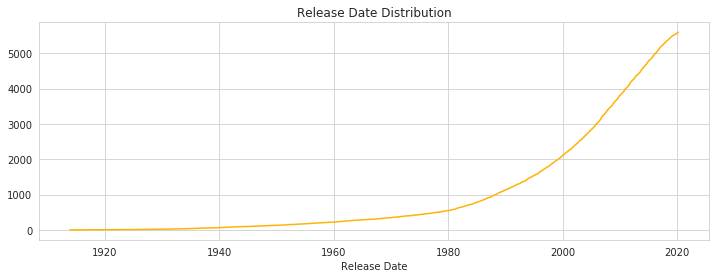

In [32]:
# plot release date distribution

sns.lineplot(x=movie_df['release_date'], y=np.linspace(0, len(movie_df['release_date']), 
                                                       num=len(movie_df['release_date'])), color=mp.colors(3))

plt.xlabel('Release Date')
plt.title('Release Date Distribution');

The release dates are fairly continuous. I'm not concerned with the sparsity of samples from the earliest years.

> **REVENUE**

In [33]:
# observe quantiles and outliers
movie_df['revenue'].describe()

count    5.594000e+03
mean     1.488152e+08
std      2.864667e+08
min      7.448597e+00
25%      1.404537e+07
50%      5.600521e+07
75%      1.644524e+08
max      7.377968e+09
Name: revenue, dtype: float64

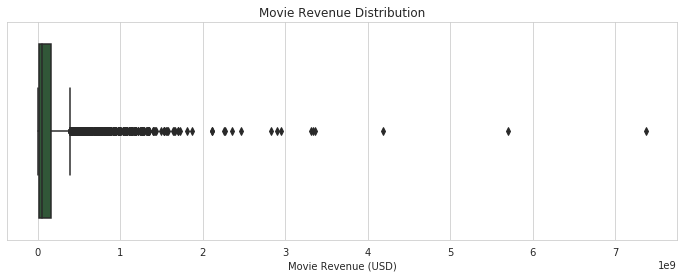

In [34]:
# plot revenue quantiles

sns.boxplot(movie_df['revenue'], color=mp.colors(4), )

plt.xlabel('Movie Revenue (USD)')
plt.title('Movie Revenue Distribution');

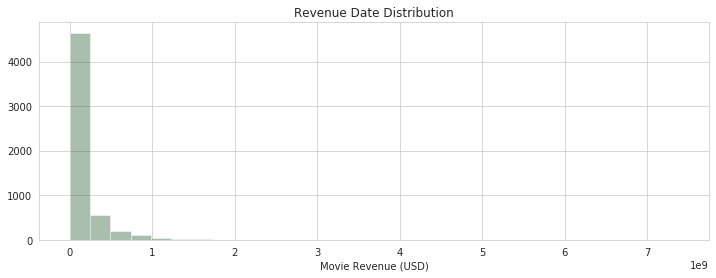

In [35]:
# plot revenue distribution

sns.distplot(movie_df['revenue'], bins=30, color=mp.colors(4), 
             axlabel='Movie Revenue (USD)', kde=False)

plt.title('Revenue Date Distribution');

In [36]:
# observe bottom revenues
movie_df.sort_values('revenue')[:5]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast
3347,4.968603e+06,"[Action, Adventure, Comedy]",38140,2007-08-31,7.448597,98.0,To Rob a Thief,6.6,12.0,"[{'cast_id': 1015, 'character': 'Alejandro Tol..."
1457,5.842109e+07,"[History, War, Action, Drama]",31642,1993-12-24,8.851680,140.0,Heaven & Earth,6.6,107.0,"[{'cast_id': 2, 'character': 'Steve Butler', '..."
1618,1.074779e+07,"[Thriller, Romance]",48781,1995-10-20,10.076057,86.0,Never Talk to Strangers,5.2,84.0,"[{'cast_id': 1, 'character': 'Dr. Sarah Alison..."
2085,3.069144e+06,"[Romance, Drama]",108346,1999-10-29,10.742004,92.0,Dreaming of Joseph Lees,5.0,4.0,"[{'cast_id': 5, 'character': 'Joseph Lees', 'c..."
2536,1.420556e+07,"[History, Crime, Drama]",63903,2003-01-24,14.205559,96.0,Stealing Sinatra,4.9,7.0,"[{'cast_id': 1, 'character': 'Barry Keenan', '..."


In [37]:
# observe top revenues
movie_df.sort_values('revenue', ascending=False)[:5]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast
64,7.374714e+07,"[Drama, Romance, War]",770,1939-12-15,7.377968e+09,233.0,Gone with the Wind,7.9,2207.0,"[{'cast_id': 10, 'character': 'Scarlett O'Hara..."
144,2.989749e+07,"[Animation, Family, Fantasy, Adventure]",12092,1951-07-28,5.700455e+09,75.0,Alice in Wonderland,7.1,3949.0,"[{'cast_id': 21, 'character': 'Alice (voice)',..."
84,1.342198e+07,"[Animation, Drama, Family]",3170,1942-08-14,4.183765e+09,70.0,Bambi,7.0,3691.0,"[{'cast_id': 9, 'character': 'Young Bambi (voi..."
53,2.705523e+07,"[Fantasy, Animation, Family]",408,1938-01-01,3.361411e+09,83.0,Snow White and the Seven Dwarfs,7.1,4976.0,"[{'cast_id': 14, 'character': 'Snow White (voi..."
3803,2.832764e+08,"[Action, Adventure, Fantasy, Science Fiction]",19995,2009-12-10,3.332341e+09,162.0,Avatar,7.4,21157.0,"[{'cast_id': 242, 'character': 'Jake Sully', '..."


I can believe that these values are true. This is the type of distinction I am trying to capture.

> **RUNTIME**

In [38]:
# observe quantiles and outliers
movie_df['runtime'].describe()

count    5594.000000
mean      108.660529
std        20.203596
min        70.000000
25%        95.000000
50%       105.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

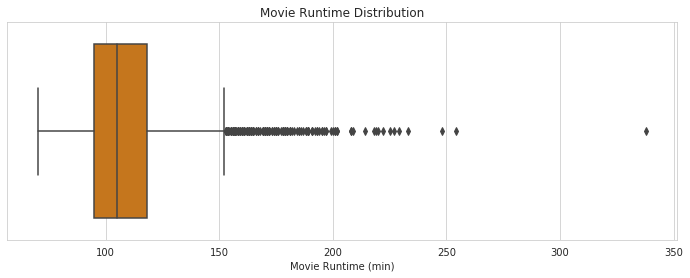

In [39]:
# plot runtime quantiles

sns.boxplot(movie_df['runtime'], color=mp.colors(5))

plt.xlabel('Movie Runtime (min)')
plt.title('Movie Runtime Distribution');

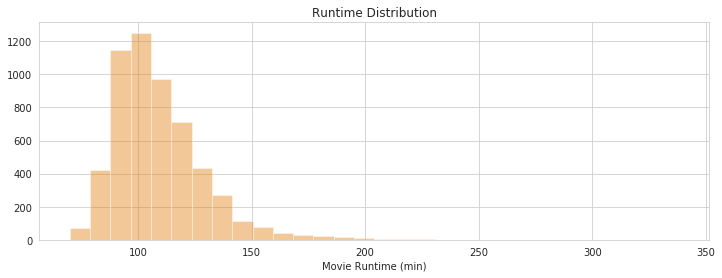

In [40]:
# plot runtime distribution

sns.distplot(movie_df['runtime'], bins=30, color=mp.colors(5), 
             axlabel='Movie Runtime (min)', kde=False)

plt.title('Runtime Distribution');

In [41]:
# observe the long running movies
movie_df.sort_values('runtime', ascending=False)[:5]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast
3956,2.124296e+07,"[Crime, Drama, Thriller, History]",43434,2010-10-11,1.028253e+06,338.0,Carlos,7.0,104.0,"[{'cast_id': 4, 'character': 'Ilich Ramírez Sá..."
1432,4.428878e+07,"[Drama, History, War]",10655,1993-10-08,2.249870e+07,254.0,Gettysburg,6.9,158.0,"[{'cast_id': 1, 'character': 'Col. Joshua Cham..."
270,2.624591e+08,"[Drama, History, Romance]",8095,1963-06-12,5.988943e+08,248.0,Cleopatra,7.0,339.0,"[{'cast_id': 2, 'character': 'Cleopatra', 'cre..."
64,7.374714e+07,"[Drama, Romance, War]",770,1939-12-15,7.377968e+09,233.0,Gone with the Wind,7.9,2207.0,"[{'cast_id': 10, 'character': 'Scarlett O'Hara..."
745,4.992553e+07,"[Drama, Crime]",311,1984-05-23,1.323027e+07,229.0,Once Upon a Time in America,8.4,2897.0,"[{'cast_id': 3, 'character': 'David 'Noodles' ..."


The movie Carlos is a significant outlier, but it is a real movie. I will leave these movies in the dataset.

> **ROI**

I will be replacing the budget and revenue numbers with a Return on Investment value for the movie studio.<br>
There is more than one way to express this. This is how I will define it.

$$ROI = \frac{REVENUE}{BUDGET}$$

This is a very simple view and doesn't take into account how the money actually flows through the differnt hands that touch a movie.<br>
There are cuts taken out for distributors, exhibitors, retailers, and sales groups, as well as actor and directror shares of the producer profits.<br>
While these factors complicate the meaning of Return on Investment, they are not important in the context of this project.<br>
I am not trying to extract true numbers for ROI, only using it to extract meaningful relationships between actors and movies.<br>
It is only important to have a ratio that can be analyzed for making comparisions between actors.<br>
Any multiplying factors or constants used to modify this relationship merely scales or shifts the data.<br>
It does not distort the comparison between the value of actors to a movie's profit.

In [42]:
# combine both monetary columns to get ROI
movie_df['roi'] = movie_df[['revenue']].divide(movie_df['budget'], axis='index')
movie_df[['budget', 'revenue', 'roi']].head()

,budget,revenue,roi
0,1.456689e+05,4.600069e+07,315.789474
1,2.581150e+06,2.839265e+08,110.000000
2,1.952082e+08,9.301441e+07,0.476488
3,2.284204e+07,3.175043e+07,1.390000
4,4.450259e+06,1.780103e+08,40.000000


This new variable gives a break-even number of 1.<br>
It's smallest possible value is zero for a movie that didn't have any revenue.<br>
Numbers between 0 and 1 represent studio losses.<br>
Numbers above 1 are multiples of investment dollars returned as profit.

In [43]:
# observe quantiles and outliers
movie_df['roi'].describe()

count    5.594000e+03
mean     5.819508e+00
std      5.863967e+01
min      1.515152e-07
25%      7.656423e-01
50%      2.007060e+00
75%      4.148645e+00
max      4.133333e+03
Name: roi, dtype: float64

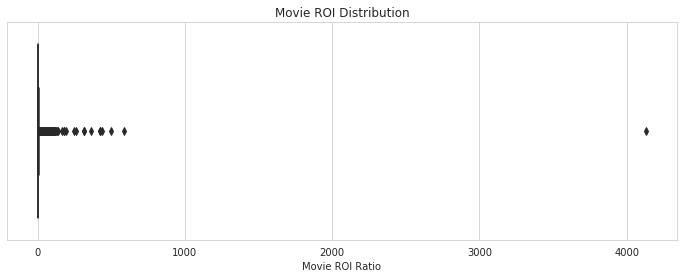

In [44]:
# plot ROI quantiles

sns.boxplot(movie_df['roi'], color=mp.colors(4))

plt.xlabel('Movie ROI Ratio')
plt.title('Movie ROI Distribution');

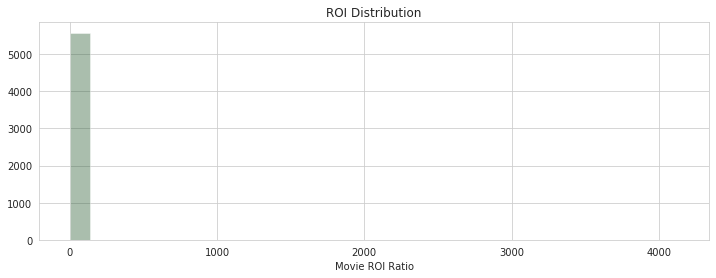

In [45]:
# plot ROI distribution

sns.distplot(movie_df['roi'], bins=30, color=mp.colors(4), 
             axlabel='Movie ROI Ratio', kde=False)

plt.title('ROI Distribution');

In [46]:
movie_df.sort_values('roi')[:5]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast,roi
1457,5.842109e+07,"[History, War, Action, Drama]",31642,1993-12-24,8.851680,140.0,Heaven & Earth,6.6,107.0,"[{'cast_id': 2, 'character': 'Steve Butler', '...",1.515152e-07
2680,3.205532e+07,"[Comedy, Romance]",14844,2004-01-09,16.724514,111.0,Chasing Liberty,6.2,395.0,"[{'cast_id': 1, 'character': 'Anna Foster', 'c...",5.217391e-07
2786,2.174745e+07,"[Comedy, Drama]",18475,2004-09-03,16.310585,97.0,The Cookout,5.2,18.0,"[{'cast_id': 1, 'character': 'Bling Bling', 'c...",7.500000e-07
1618,1.074779e+07,"[Thriller, Romance]",48781,1995-10-20,10.076057,86.0,Never Talk to Strangers,5.2,84.0,"[{'cast_id': 1, 'character': 'Dr. Sarah Alison...",9.375000e-07
2536,1.420556e+07,"[History, Crime, Drama]",63903,2003-01-24,14.205559,96.0,Stealing Sinatra,4.9,7.0,"[{'cast_id': 1, 'character': 'Barry Keenan', '...",1.000000e-06


In [47]:
movie_df.sort_values('roi', ascending=False)[:5]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast,roi
2036,92902.819436,"[Horror, Mystery]",2667,1999-07-14,3.839983e+08,81.0,The Blair Witch Project,6.3,2713.0,"[{'cast_id': 5, 'character': 'Heather', 'credi...",4133.333333
439,292758.034026,"[Drama, Romance]",47178,1975-04-29,1.707755e+08,88.0,"Aloha, Bobby and Rose",6.1,7.0,"[{'cast_id': 0, 'character': 'Bobby Eckert', '...",583.333333
388,74815.942029,"[Comedy, Crime]",692,1972-03-12,3.740797e+07,92.0,Pink Flamingos,6.5,247.0,"[{'cast_id': 8, 'character': 'Divine / Babs Jo...",500.000000
2686,90591.117711,"[Documentary, Comedy, Drama]",9372,2004-01-17,3.982536e+07,100.0,Super Size Me,6.7,1044.0,"[{'cast_id': 1, 'character': 'Himself', 'credi...",439.616585
4863,108154.483059,"[Horror, Thriller]",299245,2015-07-10,4.614347e+07,87.0,The Gallows,4.8,671.0,"[{'cast_id': 0, 'character': 'Cassidy', 'credi...",426.644100


In [48]:
movie_df[movie_df['title'] == 'Mad Max']

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast,roi
528,1.462408e+06,"[Adventure, Action, Thriller, Science Fiction]",9659,1979-04-12,3.656020e+08,91.0,Mad Max,6.7,2547.0,"[{'cast_id': 1, 'character': 'Max Rockatansky'...",250.0


In [49]:
movie_df[movie_df['title'] == 'Rocky']

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast,roi
470,4.450259e+06,[Drama],1366,1976-11-21,5.217267e+08,119.0,Rocky,7.7,4574.0,"[{'cast_id': 16, 'character': 'Robert ""Rocky"" ...",117.235147


Seeing The Blair Witch Project as the huge outlier gives me confidence that this variable will be useful.

> **MOVIE ID & TITLE**

The TMDb IDs and titles are being kept to reference movies.<br>
They will help with heuristic model evaluation based on my knowledge of movies and information about them on the internet.

In [50]:
# verifying unique IDs
movie_df['movie_id'].is_unique

True

While I wouldn't expect to have unique movie titles, it good to have unique IDs.

> **VOTE AVERAGE**

In [51]:
# observe quantiles and outliers
movie_df['vote_average'].describe()

count    5594.000000
mean        6.377905
std         0.902020
min         1.500000
25%         5.800000
50%         6.400000
75%         7.000000
max        10.000000
Name: vote_average, dtype: float64

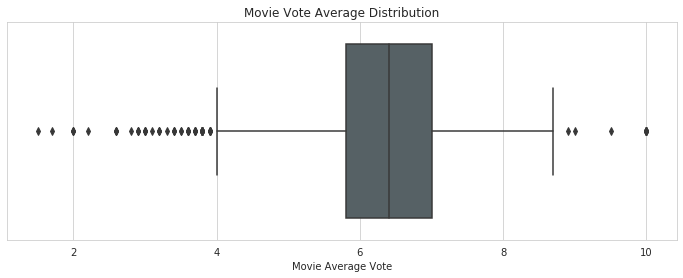

In [52]:
# plot vote average quantiles

sns.boxplot(movie_df['vote_average'], color=mp.colors(6))

plt.xlabel('Movie Average Vote')
plt.title('Movie Vote Average Distribution');

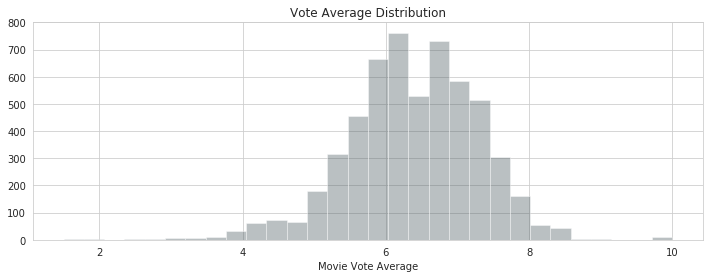

In [53]:
# plot vote average distribution

sns.distplot(movie_df['vote_average'], bins=30, color=mp.colors(6), 
             axlabel='Movie Vote Average', kde=False)

plt.title('Vote Average Distribution');

The vote average leans favorable.

In [54]:
# checking on the 10's
movie_df.loc[movie_df['vote_average'] == 10]['vote_count']

164     1.0
638     1.0
4934    1.0
5068    1.0
5166    1.0
5316    1.0
5322    1.0
5323    1.0
5593    1.0
Name: vote_count, dtype: float64

The movies with averages of 10 only have one vote each.<br>
This feature looks clean.

> **VOTE COUNT**

In [55]:
# observe quantiles and outliers
movie_df['vote_count'].describe()

count     5594.000000
mean      1597.671970
std       2584.441452
min          1.000000
25%        176.000000
50%        640.000000
75%       1825.750000
max      25603.000000
Name: vote_count, dtype: float64

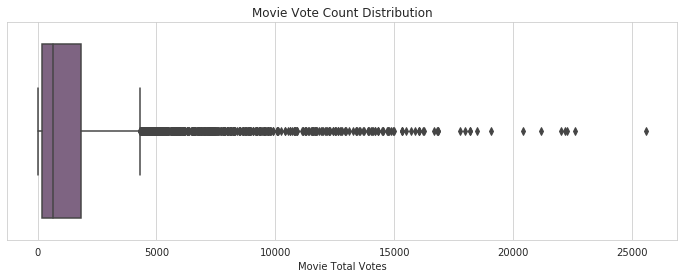

In [56]:
# plot vote count quantiles

sns.boxplot(movie_df['vote_count'], color=mp.colors(1))

plt.xlabel('Movie Total Votes')
plt.title('Movie Vote Count Distribution');

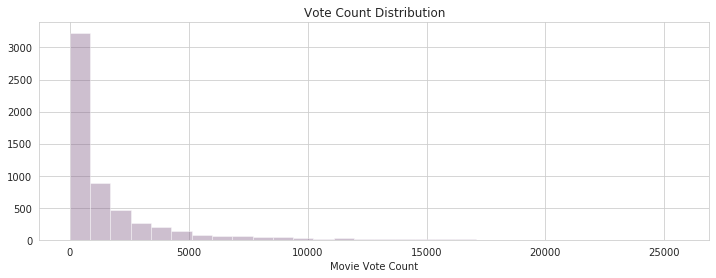

In [57]:
# plot vote count distribution

sns.distplot(movie_df['vote_count'], bins=30, color=mp.colors(1), 
             axlabel='Movie Vote Count', kde=False)

plt.title('Vote Count Distribution');

In [58]:
# observe high vote count outlier
movie_df.loc[movie_df['vote_count'] == movie_df['vote_count'].max()]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast,roi
3898,1.894326e+08,"[Action, Science Fiction, Adventure]",27205,2010-07-15,9.773928e+08,148.0,Inception,8.3,25603.0,"[{'cast_id': 1, 'character': 'Dom Cobb', 'cred...",5.15958


That looks right to me.

> **VOTE WEIGHTED**

I want to assign weighted vote scores to the movies. Movies with low number of vote counts will be assigned closer to the average of all movies.

$$VoteWeighted = wR + (1 - w)C$$

where $$w = \frac{Vote Count(Movie)}{Vote Count(Movie) + Vote Count(All Movies)}$$<br>
R is the vote average for a movie, and C is the vote average for all movies.

In [59]:
# create true Bayesian average function
M = np.mean(movie_df['vote_count']) # vote count for all movies
C = np.mean(movie_df['vote_average']) # vote average for all movies
def weight_votes(data):
    """Returns a true Bayesian average vote from total and average votes of individual movies and all movies."""
    weight = data['vote_count'] / (data['vote_count'] + M)
    weighted_vote = weight * np.mean(data['vote_average'] + (1 - weight) * C)
    return weighted_vote

In [60]:
# create weighted vote feature
movie_df['vote_weighted'] = weight_votes(movie_df)
movie_df.iloc[np.r_[0:3, -3:0]]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast,roi,vote_weighted
0,1.456689e+05,"[Drama, Crime]",96128,1913-11-24,4.600069e+07,88.0,Traffic in Souls,5.6,12.0,"[{'cast_id': 10, 'character': 'Mary Barton', '...",315.789474,0.079318
1,2.581150e+06,"[Drama, History, War]",618,1915-02-08,2.839265e+08,193.0,The Birth of a Nation,6.3,277.0,"[{'cast_id': 16, 'character': 'Elsie Stoneman'...",110.000000,1.572110
2,1.952082e+08,"[Drama, History]",3059,1916-09-04,9.301441e+07,197.0,Intolerance: Love's Struggle Throughout the Ages,7.5,157.0,"[{'cast_id': 23, 'character': 'The Woman Who R...",0.476488,0.951990
5591,4.200000e+07,"[Action, Science Fiction]",338762,2020-03-05,2.457362e+07,110.0,Bloodshot,7.1,2076.0,"[{'cast_id': 51, 'character': 'Ray Garrison / ...",0.585086,6.012505
5592,1.400000e+07,"[Action, Thriller, Horror]",514847,2020-03-11,6.512500e+06,90.0,The Hunt,6.8,607.0,"[{'cast_id': 29, 'character': 'Crystal', 'cred...",0.465179,2.929363
5593,2.700000e+07,"[Mystery, Action, Crime, Drama, Thriller]",686704,2020-03-16,4.832000e+07,115.0,Scarlet Tulips,10.0,1.0,"[{'cast_id': 2, 'character': 'Sebastian Spade'...",1.789630,0.006655


In [61]:
# observe quantiles and outliers
movie_df['vote_weighted'].describe()

count    5594.000000
mean        3.530150
std         2.748413
min         0.006655
25%         1.055766
50%         3.043071
75%         5.674262
max        10.014741
Name: vote_weighted, dtype: float64

The new averages are allowed to go beyond 10. This would happen with a movie that has a high average vote and a large number of votes.

In [62]:
# find movies now rated above 10
movie_df[movie_df['vote_weighted'] > 10]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast,roi,vote_weighted
3898,1.894326e+08,"[Action, Science Fiction, Adventure]",27205,2010-07-15,9.773928e+08,148.0,Inception,8.3,25603.0,"[{'cast_id': 1, 'character': 'Dom Cobb', 'cred...",5.15958,10.014741


In [63]:
# compare average vote of Inception vs. all movies
movie_df.loc[3973]['vote_average'] - C

0.5220951018948874

In [64]:
# compare total votes for Inception vs. all movies
movie_df.loc[3973]['vote_count'] / M

0.1151675709774803

Inception's average vote is almost 2 point above the avereage movie, and it's vote count is over 16 times the average movie.

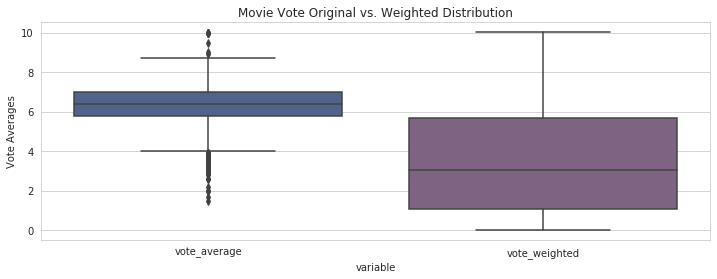

In [65]:
# plot vote weighted quantiles vs. the original

sns.boxplot(x="variable", y="value", data=pd.melt(movie_df[['vote_average', 'vote_weighted']]))

plt.ylabel('Vote Averages')
plt.title('Movie Vote Original vs. Weighted Distribution');

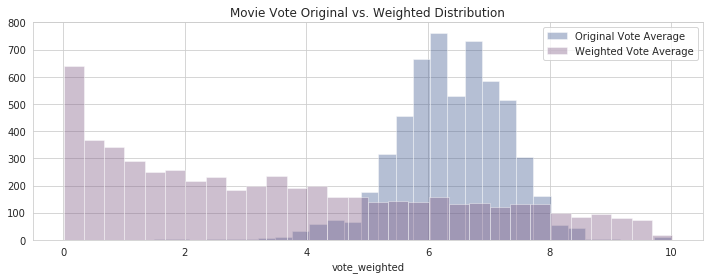

In [66]:
# plot original vs. weighted vote distribution

sns.distplot(movie_df['vote_average'], bins=30, color=mp.colors(0), 
             label='Original Vote Average', kde=False)
sns.distplot(movie_df['vote_weighted'], bins=30, color=mp.colors(1), 
             label='Weighted Vote Average', kde=False)

plt.legend()
plt.title('Movie Vote Original vs. Weighted Distribution');

The weighting function has really penalized the large number of low vote count movies.

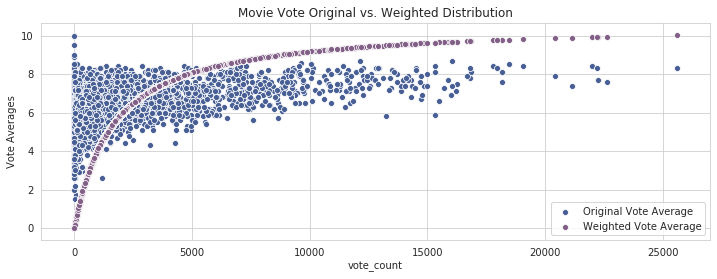

In [67]:
# plot original vs. weighted vote distribution

sns.scatterplot(data=movie_df, x='vote_count',  y='vote_average', label='Original Vote Average', color=mp.colors(0))
sns.scatterplot(data=movie_df, x='vote_count',  y='vote_weighted', label='Weighted Vote Average', color=mp.colors(1))

plt.ylabel('Vote Averages')
plt.legend()
plt.title('Movie Vote Original vs. Weighted Distribution');

> **GENRES**

The 19 unique TMDb genre categories are grouped together into lists of genre combinations.<br>
One possible way to observe these combinations is to treat them as unique genres, themselves.<br>
This significantly increases the dimensionality of the data.<br>
I'll investigate this possibility.

I want to get a count of unique genre combinations.<br>
I needed to convert the column of lists to a Series of tuples to avoid an unhashable type error.

In [68]:
# put unique genres lists into Series
unique_genres_count = movie_df['genres'].apply(tuple).value_counts()

In [69]:
# observe Series
unique_genres_count

(Drama,)                                   354
(Comedy,)                                  307
(Drama, Romance)                           189
(Comedy, Romance)                          150
(Comedy, Drama)                            148
                                          ... 
(Adventure, Mystery, Thriller)               1
(Comedy, Action, Romance)                    1
(Comedy, Adventure, Romance)                 1
(Animation, Family, Adventure, Fantasy)      1
(Romance, Comedy, Fantasy)                   1
Name: genres, Length: 1374, dtype: int64

Note that the genres are the keys of this Series.

In [70]:
# count unique combinations of genres
len(unique_genres_count)

1374

I want to make the unique genre combinations features, but there are a lot of them.<br>
I will look at their distribution.

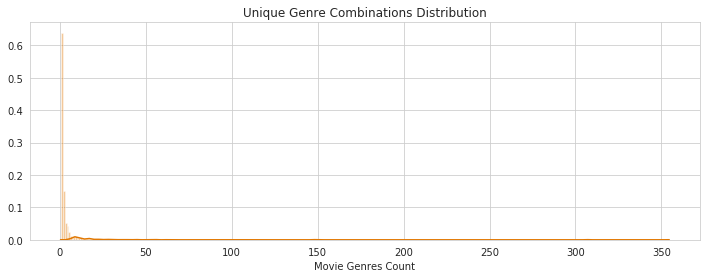

In [71]:
# plot genres distribution

sns.distplot(unique_genres_count, bins=360, color=mp.colors(5), axlabel='Movie Genres Count')

plt.title('Unique Genre Combinations Distribution');

I want to isolate where the distribution flattens out to bin unique genre combinations with few entries together.

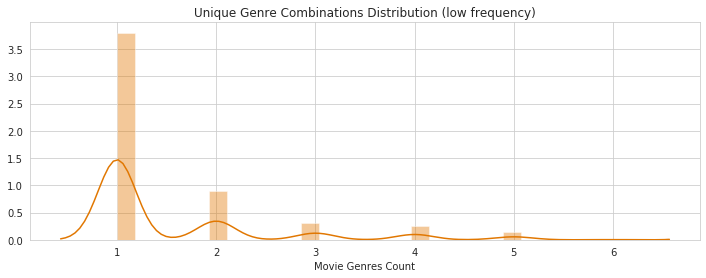

In [72]:
# plot genres distribution for low count of movies

sns.distplot(unique_genres_count[150:], color=mp.colors(5), axlabel='Movie Genres Count')

plt.title('Unique Genre Combinations Distribution (low frequency)');

In [73]:
# look for where genre combinations drop to individual movies
unique_genres_count[510:]

(Drama, Thriller, Romance)                     2
(Drama, Family, Fantasy, Adventure)            2
(Action, Adventure, Family, Fantasy)           2
(Fantasy, Drama, Thriller, Science Fiction)    1
(Fantasy, Family)                              1
                                              ..
(Adventure, Mystery, Thriller)                 1
(Comedy, Action, Romance)                      1
(Comedy, Adventure, Romance)                   1
(Animation, Family, Adventure, Fantasy)        1
(Romance, Comedy, Fantasy)                     1
Name: genres, Length: 864, dtype: int64

The counts drop down to one observation per genre combination at index 513.

In [74]:
# observe percentage of movies that are the only observation of their genre combination
unique_genres_count[513:].sum() / len(movie_df['genres'])

0.15391490883089023

Binning all of these movies together would reduce the dataset by 15%.<br>
I would have 512 unique move genre combinations plus one miscellaneous genre.

In [75]:
# isolate movies that are the only observation of their genre combination and put them in nested list
one_movie_genres = [list(x) for x in list(unique_genres_count[unique_genres_count == 1].index)]
one_movie_genres[:3]

[['Fantasy', 'Drama', 'Thriller', 'Science Fiction'],
 ['Fantasy', 'Family'],
 ['Science Fiction', 'Comedy', 'Crime']]

In [76]:
# count the number of movies that will be grouped together
len(one_movie_genres)

861

This is how many observations would lose their unique effect by binning them together.<br>
I am not ready to drop these movies, quite yet.

A second way to use the genre combination lists is to normalize them into the general TMDb genres that they contain.<br>
This would allow for the reconstuction of the metrics for each movie<br>
It would, also, enable comparisons between genre combination neighbors in feature space.<br>
For example, if I know an actor's value in a romance/comedy movie, I could combine that with their value in dramas to predict a new value for unseen data.<br>
This give my model more generalizability.

In [77]:
# instantiate MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [78]:
# binarize genres labels
binary_genres = mlb.fit_transform(movie_df['genres'])
binary_genres

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]])

In [79]:
# observe new column names
mlb.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western'], dtype=object)

In [80]:
# create a DataFrame from the binarizeded array and normalize it across the rows
binary_genres_df = pd.DataFrame(binary_genres, columns=mlb.classes_)
binary_genres_df.iloc[np.r_[0:3, -3:0]]

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
5591,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5592,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
5593,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [81]:
# normalize binarized DataFrame across the rows
norm_genres_df = binary_genres_df.div(binary_genres_df.sum(axis=1), axis=0)
norm_genres_df.iloc[np.r_[0:3, -3:0]]

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0.000000,0.0,0.0,0.0,0.5,0.0,0.500000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
5591,0.500000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.5,0.0,0.000000,0.000000,0.0
5592,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.0
5593,0.200000,0.0,0.0,0.0,0.2,0.0,0.200000,0.0,0.0,0.000000,0.000000,0.0,0.2,0.0,0.0,0.0,0.200000,0.000000,0.0


In [82]:
# observe size of genres in original form
movie_df['genres'].memory_usage()

44880

In [83]:
# observe size of genres in new form
norm_genres_df.memory_usage().sum()

850416

In [84]:
# join two DataFrames
movie_df = movie_df.join(norm_genres_df)
movie_df.iloc[np.r_[0:2, -2:0]]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1.456689e+05,"[Drama, Crime]",96128,1913-11-24,4.600069e+07,88.0,Traffic in Souls,5.6,12.0,"[{'cast_id': 10, 'character': 'Mary Barton', '...",...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,2.581150e+06,"[Drama, History, War]",618,1915-02-08,2.839265e+08,193.0,The Birth of a Nation,6.3,277.0,"[{'cast_id': 16, 'character': 'Elsie Stoneman'...",...,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0
5592,1.400000e+07,"[Action, Thriller, Horror]",514847,2020-03-11,6.512500e+06,90.0,The Hunt,6.8,607.0,"[{'cast_id': 29, 'character': 'Crystal', 'cred...",...,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.0
5593,2.700000e+07,"[Mystery, Action, Crime, Drama, Thriller]",686704,2020-03-16,4.832000e+07,115.0,Scarlet Tulips,10.0,1.0,"[{'cast_id': 2, 'character': 'Sebastian Spade'...",...,0.000000,0.000000,0.0,0.2,0.0,0.0,0.0,0.200000,0.000000,0.0


In [85]:
# make column names lowercase and remove white spaces
movie_df.columns = movie_df.columns.str.lower().str.replace(' ', '_')
movie_df.columns

Index(['budget', 'genres', 'movie_id', 'release_date', 'revenue', 'runtime',
       'title', 'vote_average', 'vote_count', 'cast', 'roi', 'vote_weighted',
       'action', 'adventure', 'animation', 'comedy', 'crime', 'documentary',
       'drama', 'family', 'fantasy', 'history', 'horror', 'music', 'mystery',
       'romance', 'science_fiction', 'tv_movie', 'thriller', 'war', 'western'],
      dtype='object')

> **CAST**

In [86]:
# observe general form of cast lists
movie_df['cast']

0       [{'cast_id': 10, 'character': 'Mary Barton', '...
1       [{'cast_id': 16, 'character': 'Elsie Stoneman'...
2       [{'cast_id': 23, 'character': 'The Woman Who R...
3       [{'cast_id': 3, 'character': 'Anitia', 'credit...
4       [{'cast_id': 1, 'character': 'Prince Daaker's ...
                              ...                        
5589    [{'cast_id': 0, 'character': 'Himself', 'credi...
5590    [{'cast_id': 7, 'character': 'Cecilia Kass', '...
5591    [{'cast_id': 51, 'character': 'Ray Garrison / ...
5592    [{'cast_id': 29, 'character': 'Crystal', 'cred...
5593    [{'cast_id': 2, 'character': 'Sebastian Spade'...
Name: cast, Length: 5594, dtype: object

In [87]:
# observe cast from one movie
movie_df['cast'][5501]

[{'cast_id': 493,
  'character': 'Tony Stark / Iron Man',
  'credit_id': '5e85cd735294e700134abf26',
  'gender': 2,
  'id': 3223,
  'name': 'Robert Downey Jr.',
  'order': 0,
  'profile_path': '/1YjdSym1jTG7xjHSI0yGGWEsw5i.jpg'},
 {'cast_id': 494,
  'character': 'Steve Rogers / Captain America',
  'credit_id': '5e85cd84691cd50018593984',
  'gender': 2,
  'id': 16828,
  'name': 'Chris Evans',
  'order': 1,
  'profile_path': '/7dUkkq1lK593XvOjunlUB11lKm1.jpg'},
 {'cast_id': 594,
  'character': 'Bruce Banner / Hulk',
  'credit_id': '5e85e1ab0c3ec800135aabd6',
  'gender': 2,
  'id': 103,
  'name': 'Mark Ruffalo',
  'order': 2,
  'profile_path': '/z3dvKqMNDQWk3QLxzumloQVR0pv.jpg'},
 {'cast_id': 496,
  'character': 'Thor Odinson',
  'credit_id': '5e85ce145294e700154ac43f',
  'gender': 2,
  'id': 74568,
  'name': 'Chris Hemsworth',
  'order': 3,
  'profile_path': '/6fGCcu1bbc0tVCMhQRmeRryGVMa.jpg'},
 {'cast_id': 497,
  'character': 'Natasha Romanoff / Black Widow',
  'credit_id': '5e85ce255ab

The lists hold one dict for each actor. The number of actors varies between movies.

In [88]:
# check for duplicate rows
movie_df.drop(['genres', 'cast'], axis=1).duplicated().sum()

0

In [89]:
# create DataFarme with cast members expanded into their own rows and duplicate indices which match the movies
cast_members_df = movie_df.drop(columns=['cast']).join(movie_df['cast'].explode().to_frame())
cast_members_df

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,roi,...,horror,music,mystery,romance,science_fiction,tv_movie,thriller,war,western,cast
0,1.456689e+05,"[Drama, Crime]",96128,1913-11-24,4.600069e+07,88.0,Traffic in Souls,5.6,12.0,315.789474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'cast_id': 10, 'character': 'Mary Barton', 'c..."
0,1.456689e+05,"[Drama, Crime]",96128,1913-11-24,4.600069e+07,88.0,Traffic in Souls,5.6,12.0,315.789474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'cast_id': 3, 'character': 'Lorna Barton', 'c..."
0,1.456689e+05,"[Drama, Crime]",96128,1913-11-24,4.600069e+07,88.0,Traffic in Souls,5.6,12.0,315.789474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'cast_id': 4, 'character': 'Mary's father', '..."
0,1.456689e+05,"[Drama, Crime]",96128,1913-11-24,4.600069e+07,88.0,Traffic in Souls,5.6,12.0,315.789474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'cast_id': 5, 'character': 'Burke', 'credit_i..."
0,1.456689e+05,"[Drama, Crime]",96128,1913-11-24,4.600069e+07,88.0,Traffic in Souls,5.6,12.0,315.789474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'cast_id': 6, 'character': 'Alice Trubus', 'c..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5593,2.700000e+07,"[Mystery, Action, Crime, Drama, Thriller]",686704,2020-03-16,4.832000e+07,115.0,Scarlet Tulips,10.0,1.0,1.789630,...,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,"{'cast_id': 3, 'character': 'Quentin Sharpe', ..."
5593,2.700000e+07,"[Mystery, Action, Crime, Drama, Thriller]",686704,2020-03-16,4.832000e+07,115.0,Scarlet Tulips,10.0,1.0,1.789630,...,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,"{'cast_id': 1, 'character': 'Sarah Kelly', 'cr..."
5593,2.700000e+07,"[Mystery, Action, Crime, Drama, Thriller]",686704,2020-03-16,4.832000e+07,115.0,Scarlet Tulips,10.0,1.0,1.789630,...,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,"{'cast_id': 15, 'character': 'Himself', 'credi..."
5593,2.700000e+07,"[Mystery, Action, Crime, Drama, Thriller]",686704,2020-03-16,4.832000e+07,115.0,Scarlet Tulips,10.0,1.0,1.789630,...,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,"{'cast_id': 13, 'character': 'Sailor #1', 'cre..."


In [90]:
# expand dicts of cast column as their own DataFrame
cast_normalized_df = pd.json_normalize(cast_members_df['cast'])
cast_normalized_df

,cast_id,character,credit_id,gender,id,name,order,profile_path
0,10,Mary Barton,5e2b57a9532acb0019515e07,1,105945,Jane Gail,0,/pFmtBjoHCK1JRhBNfTeyRcLSYSW.jpg
1,3,Lorna Barton,52fe49a29251416c750ce52b,1,1070243,Ethel Grandin,1,/bPGgdb4cGLjxH78wrXnAUUKx3q7.jpg
2,4,Mary's father,5bb6ff690e0a2633a701f416,0,1405084,William H. Turner,2,/6uGbk83pJpeUgQf5XTPPkVikIF6.jpg
3,5,Burke,5bb6ffec0e0a26339702019f,2,61101,Matt Moore,3,/oj7AI3ecCjOXbysuluioNsEUrhq.jpg
4,6,Alice Trubus,5bb70008c3a368151002400f,0,2142031,Irene Wallace,4,None
...,...,...,...,...,...,...,...,...
168462,3,Quentin Sharpe,5e7ce47bd861af2f0ab80f00,2,2550091,Charlie R. Knibb,1,/wbWEKnnTxaIerDO8T4fpZ0UpNbt.jpg
168463,1,Sarah Kelly,5e7ce405109dec1ebb024e64,1,2550092,Emma Coe,2,/mTBfqpqCjs7FVZVCtGKW6QbHfrq.jpg
168464,15,Himself,5e7ce699ab1bc75cb1c2a410,2,2562896,Bobby Seagull,3,/6ZDIf5Sqk0CP9kTnf6gguduUG6S.jpg
168465,13,Sailor #1,5e7ce67bd861af312ab84612,0,2562894,Patrick Knibb,4,/kx0crEX2iuXUfosqvwXj4TeseZl.jpg


In [91]:
# rename actor id to avoid confusion
cast_normalized_df.rename(columns={'id': 'person_id'}, inplace=True)

In [92]:
# drop columns not needed
cast_normalized_df.drop(['cast_id', 'character', 'credit_id', 'gender', 'name', 'profile_path'], 
                        axis=1, inplace=True)
cast_normalized_df

,person_id,order
0,105945,0
1,1070243,1
2,1405084,2
3,61101,3
4,2142031,4
...,...,...
168462,2550091,1
168463,2550092,2
168464,2562896,3
168465,2562894,4


In [93]:
# reset the index to merge on normalized DataFrame
cast_members_df.reset_index(drop=True, inplace=True)

In [94]:
# observe features of new movie DataFrame
cast_members_df.columns

Index(['budget', 'genres', 'movie_id', 'release_date', 'revenue', 'runtime',
       'title', 'vote_average', 'vote_count', 'roi', 'vote_weighted', 'action',
       'adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'romance',
       'science_fiction', 'tv_movie', 'thriller', 'war', 'western', 'cast'],
      dtype='object')

In [95]:
# drop columns not needed
cast_members_df.drop(['budget', 'genres', 'revenue', 'title', 'vote_average', 'vote_count', 'cast'], 
                     axis=1, inplace=True)
cast_members_df.iloc[np.r_[0:2, -2:0]]

,movie_id,release_date,runtime,roi,vote_weighted,action,adventure,animation,comedy,crime,...,history,horror,music,mystery,romance,science_fiction,tv_movie,thriller,war,western
0,96128,1913-11-24,88.0,315.789474,0.079318,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,96128,1913-11-24,88.0,315.789474,0.079318,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168465,686704,2020-03-16,115.0,1.789630,0.006655,0.2,0.0,0.0,0.0,0.2,...,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0
168466,686704,2020-03-16,115.0,1.789630,0.006655,0.2,0.0,0.0,0.0,0.2,...,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0


In [96]:
# join DataFrames on index
cast_members_df = cast_members_df.join(cast_normalized_df)
cast_members_df

,movie_id,release_date,runtime,roi,vote_weighted,action,adventure,animation,comedy,crime,...,music,mystery,romance,science_fiction,tv_movie,thriller,war,western,person_id,order
0,96128,1913-11-24,88.0,315.789474,0.079318,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105945,0
1,96128,1913-11-24,88.0,315.789474,0.079318,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1070243,1
2,96128,1913-11-24,88.0,315.789474,0.079318,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1405084,2
3,96128,1913-11-24,88.0,315.789474,0.079318,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61101,3
4,96128,1913-11-24,88.0,315.789474,0.079318,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2142031,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168462,686704,2020-03-16,115.0,1.789630,0.006655,0.2,0.0,0.0,0.0,0.2,...,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,2550091,1
168463,686704,2020-03-16,115.0,1.789630,0.006655,0.2,0.0,0.0,0.0,0.2,...,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,2550092,2
168464,686704,2020-03-16,115.0,1.789630,0.006655,0.2,0.0,0.0,0.0,0.2,...,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,2562896,3
168465,686704,2020-03-16,115.0,1.789630,0.006655,0.2,0.0,0.0,0.0,0.2,...,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,2562894,4


In [97]:
# check for duplicate actors in a movie
cast_members_df.duplicated(subset=['person_id', 'movie_id']).sum()

183

I did some sleuthing on this. There are people with double credits in some movies. I will remove the duplicates.

In [98]:
# drop double credits
cast_members_df.drop_duplicates(subset=['person_id', 'movie_id'], inplace=True)

Here's the pivot I was trying to do, but maybe I'm far enough along to start to aggregate all of this.

In [99]:
#cast_pivot = cast_members_df.pivot(index='id', columns='movie_df_index')

The dataset below is from the actor data. There's just a couple of features to tack onto the monster dataset above.

> **PERSON DATASET**

In [100]:
# read in person dataset
person_df = pd.read_json('tmdb_person_clean.json')

In [101]:
# convert birthdays to datetime objects and remove timezone-aware index
person_df['birthday'] = pd.to_datetime(person_df['birthday']).dt.tz_localize(None)
person_df.head()

,birthday,known_for_department,id,name,gender,biography,popularity,place_of_birth,imdb_id
0,1944-05-14,Directing,1,George Lucas,2.0,"George Walton Lucas Jr. (born May 14, 1944) is...",6.761,"Modesto, California, USA",nm0000184
1,1951-09-25,Acting,2,Mark Hamill,2.0,"Mark Richard Hamill (born September 25, 1951) ...",10.497,"Concord, California, USA",nm0000434
2,1942-07-13,Acting,3,Harrison Ford,2.0,Legendary Hollywood Icon Harrison Ford was bor...,20.349,"Chicago, Illinois, USA",nm0000148
3,1956-10-21,Acting,4,Carrie Fisher,1.0,Carrie Frances Fisher (21 October 1956 - 27 De...,7.228,"Beverly Hills, Los Angeles, California, USA",nm0000402
4,1913-05-26,Acting,5,Peter Cushing,2.0,"Peter Wilton Cushing, OBE (26 May 1913 – 11 A...",3.902,"Kenley, Surrey, England, UK",nm0001088


In [102]:
# rename actor id to avoid confusion
person_df.rename(columns={'id': 'person_id'}, inplace=True)

In [103]:
# observe person DataFrame
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1677053 entries, 0 to 2699999
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   birthday              152712 non-null   datetime64[ns]
 1   known_for_department  1677053 non-null  object        
 2   person_id             1677053 non-null  int64         
 3   name                  1677053 non-null  object        
 4   gender                279627 non-null   float64       
 5   biography             1677053 non-null  object        
 6   popularity            1677053 non-null  float64       
 7   place_of_birth        129261 non-null   object        
 8   imdb_id               1677050 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 127.9+ MB


In [104]:
# count the actors
np.sum(person_df['known_for_department'] == 'Acting')

941186

In [105]:
# remove non-actors
person_df = person_df[person_df['known_for_department'] == 'Acting']
person_df.iloc[np.r_[0:2, -2:0]]

,birthday,known_for_department,person_id,name,gender,biography,popularity,place_of_birth,imdb_id
1,1951-09-25,Acting,2,Mark Hamill,2.0,"Mark Richard Hamill (born September 25, 1951) ...",10.497,"Concord, California, USA",nm0000434
2,1942-07-13,Acting,3,Harrison Ford,2.0,Legendary Hollywood Icon Harrison Ford was bor...,20.349,"Chicago, Illinois, USA",nm0000148
2699993,NaT,Acting,2618069,Gérard Krause,NaN,,0.600,None,
2699996,NaT,Acting,2618072,Emmanuel Camacho,NaN,,0.600,None,


In [106]:
# drop rows with missing values
person_df.dropna(inplace=True)

In [107]:
# binary encode gender
person_df['gender'] = person_df['gender'].replace(2, 0)
person_df.iloc[np.r_[0:3, -3:0]]

,birthday,known_for_department,person_id,name,gender,biography,popularity,place_of_birth,imdb_id
1,1951-09-25,Acting,2,Mark Hamill,0.0,"Mark Richard Hamill (born September 25, 1951) ...",10.497,"Concord, California, USA",nm0000434
2,1942-07-13,Acting,3,Harrison Ford,0.0,Legendary Hollywood Icon Harrison Ford was bor...,20.349,"Chicago, Illinois, USA",nm0000148
3,1956-10-21,Acting,4,Carrie Fisher,1.0,Carrie Frances Fisher (21 October 1956 - 27 De...,7.228,"Beverly Hills, Los Angeles, California, USA",nm0000402
2699707,1979-10-11,Acting,2617783,Larusso,1.0,,0.600,Paris,
2699770,1992-06-10,Acting,2617846,Tejasswi Prakash,1.0,Tejasswi Prakash Wayangankar is an Indian tele...,0.600,"Jebbah, Saudi Arabia",
2699989,1998-08-31,Acting,2618065,Saanjh Su Kumar,1.0,,0.600,São Paulo,


In [108]:
# drop columns that will not be used
person_df.drop(['known_for_department', 'biography', 'popularity', 'place_of_birth', 'imdb_id'], 
               axis=1, inplace=True)

In [109]:
# reset the index
person_df.reset_index(drop=True, inplace=True)
person_df.iloc[np.r_[0:3, -3:0]]

,birthday,person_id,name,gender
0,1951-09-25,2,Mark Hamill,0.0
1,1942-07-13,3,Harrison Ford,0.0
2,1956-10-21,4,Carrie Fisher,1.0
83651,1979-10-11,2617783,Larusso,1.0
83652,1992-06-10,2617846,Tejasswi Prakash,1.0
83653,1998-08-31,2618065,Saanjh Su Kumar,1.0


In [110]:
# observe what's left
person_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83654 entries, 0 to 83653
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   birthday   83654 non-null  datetime64[ns]
 1   person_id  83654 non-null  int64         
 2   name       83654 non-null  object        
 3   gender     83654 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.6+ MB


> **BIRTHDAY**

In [111]:
person_df['birthday'].describe()

count                   83654
unique                  33414
top       1974-01-01 00:00:00
freq                       91
first     1756-01-15 00:00:00
last      2020-01-06 00:00:00
Name: birthday, dtype: object

In [112]:
person_df.sort_values('birthday').iloc[np.r_[0:7, -7:0]]

,birthday,person_id,name,gender
24392,1756-01-15,123029,Jan Edgar Fjell,0.0
17013,1816-10-16,80645,Joseph Whitley,0.0
49942,1818-05-05,1249715,Karl Marx,0.0
42758,1819-05-24,1127369,Queen Victoria,1.0
64030,1835-11-25,1672783,Andrew Carnegie,0.0
42678,1838-10-27,1124430,John Davis Long,0.0
79005,1839-07-08,2349331,John D. Rockefeller,0.0
77190,2019-04-14,2294474,Vincent Munier,0.0
81491,2019-05-06,2508110,Archie Mountbatten-Windsor,0.0
80554,2019-05-10,2439826,Psalm West,0.0


The birthdays are extreme in range.<br>
Jan Edgar Fjell was born in 1956. Miguel Iza was born in 1968. Prince Henry's son is on the list. I wonder what his star value is.<br>
I will keep these for now, as many of them will not have matches in the movie credits data. I can sort it out later, if necessary.

> **GENDER**

In [113]:
# observe gender quantiles
person_df['gender'].describe()

count    83654.000000
mean         0.413429
std          0.492451
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: gender, dtype: float64

The men play over 59% of the roles.

In [114]:
# verify actor ID is unique
person_df['person_id'].is_unique

False

In [115]:
# count duplicates
person_df['person_id'].duplicated().sum()

934

In [116]:
# drop duplicates
person_df['person_id'].drop_duplicates(inplace=True)

In [117]:
# trust but verify
person_df['person_id'].duplicated().sum()

0